[View in Colaboratory](https://colab.research.google.com/github/lycohen/ds_desafio_I/blob/master/imputacion.precio.ipynb)

In [0]:
% matplotlib inline
import matplotlib.pyplot as plt
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
#from unidecode import unidecode #QUITO TILDES

In [0]:
# Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#2. Get the file
downloaded = drive.CreateFile({'id':'1qrD6-1YZk0OYbIhEDQ46QHwrxh5XMBfP'}) # replace the id with id of file you want to access
downloaded.GetContentFile('properatti.csv')  



In [0]:
# Cargar la data de properati
df = pd.read_csv('properatti.csv')  # DATOS DE PROPIEDADES EN VENTA PROPERATI


In [0]:
##estructura


In [0]:
dfDummiesCurrency=pd.get_dummies(df['currency'])
dfDummiesCurrency.head(1)
dfDummiesCurrency['sin_moneda']=dfDummiesCurrency['PEN']+dfDummiesCurrency['UYU']
dfDummiesCurrency.drop(['PEN','UYU'],axis=1,inplace=True)

Cotizacion = 17.8

In [193]:
df2=df
#df2['precio_calculado']=df['price']*dfDummiesCurrency['ARS']*USD+df2['price']*dfDummiesCurrency['USD']*USD
df2.columns

Index(['Unnamed: 0', 'operation', 'property_type', 'place_name',
       'place_with_parent_names', 'country_name', 'state_name', 'geonames_id',
       'lat-lon', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor',
       'rooms', 'expenses', 'properati_url', 'description', 'title',
       'image_thumbnail'],
      dtype='object')

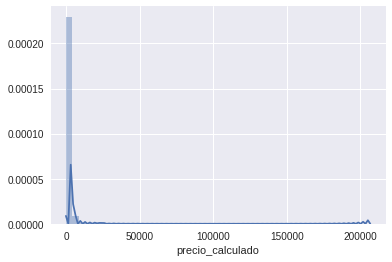

In [194]:

#df2['price_per_m2']=df2['price_per_m2'].fillna(0)
df2['precio_calculado']=df2['price_per_m2']*dfDummiesCurrency['ARS']/Cotizacion+df2['price_usd_per_m2']*dfDummiesCurrency['USD']+df2['price_per_m2']*dfDummiesCurrency['sin_moneda']
df2['precio_calculado'].describe()
sns.distplot(df2[(~df2['precio_calculado'].isna()) ]['precio_calculado']);


In [0]:
#var = 'GrLivArea'
#data = pd.concat([df2['precio_calculado'], df2['price_per_m2']], axis=1)
#data.plot.scatter(x='precio_calculado', y='price_per_m2', ylim=(0,800000));



In [0]:
dfPrecio = df.loc[:,['place_name','property_type']].copy()
dfPrecio['place_name_id'] = df['place_name'].astype('category').cat.codes
dfPrecio['property_type_id'] = df['property_type'].astype('category').cat.codes
dfPrecio['currency_id'] = df['currency'].astype('category').cat.codes
dfPrecio['precio_calculado']=df2['precio_calculado']
dfPrecio = pd.concat([dfPrecio, dfDummiesCurrency], axis=1);
dfPrecio2=dfPrecio

In [196]:
print('Por Imputar:',dfPrecio["precio_calculado"].isna().sum())



Por Imputar: 57870


In [244]:
dfPrecio["precio_calculado"] = dfPrecio.groupby(['place_name_id','property_type_id'])['precio_calculado'].transform(lambda x: x.fillna(x.mean()))
print('Sin Imputar:',dfPrecio["precio_calculado"].isna().sum() )
dfPrecio["precio_calculado"].describe()
print('Imputados:',dfPrecio[(~dfPrecio['precio_calculado'].isna()) ]['precio_calculado'].count())
print('Media Imputados:',dfPrecio[(~dfPrecio['precio_calculado'].isna()) ]['precio_calculado'].mean())




Sin Imputar: 2410
Imputados: 118810
Media Imputados: 2064.382264073252


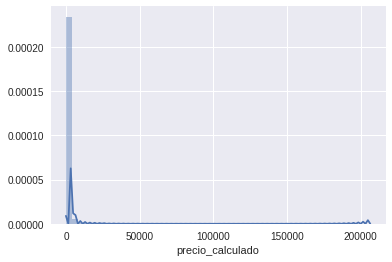

In [198]:
sns.distplot(dfPrecio[(~dfPrecio['precio_calculado'].isna()) ]['precio_calculado']);



In [199]:
dfPrecio

,place_name,property_type,place_name_id,property_type_id,currency_id,precio_calculado,ARS,USD,sin_moneda
0,Mataderos,PH,626,0,2,1127.272727,0,1,0
1,La Plata,apartment,511,1,2,1786.528330,0,1,0
2,Mataderos,apartment,626,1,2,1309.090909,0,1,0
3,Liniers,PH,550,0,2,1499.617450,0,1,0
4,Centro,apartment,240,1,2,1828.571429,0,1,0
5,Gualeguaychú,house,432,2,-1,NaN,0,0,0
6,Munro,PH,657,0,2,1226.415094,0,1,0
7,Belgrano,apartment,163,1,2,3066.666667,0,1,0
8,Belgrano,apartment,163,1,2,3000.000000,0,1,0
9,Rosario,house,798,2,0,1461.750310,1,0,0


In [200]:
dfPrecio[dfPrecio["precio_calculado"].isna()]

,place_name,property_type,place_name_id,property_type_id,currency_id,precio_calculado,ARS,USD,sin_moneda
5,Gualeguaychú,house,432,2,-1,NaN,0,0,0
168,Reconquista,house,776,2,0,NaN,1,0,0
180,Emilia,house,360,2,-1,NaN,0,0,0
197,Empalme Lobos,apartment,361,1,-1,NaN,0,0,0
286,Barrio Cerrado Fincas de Maschwitz,house,106,2,2,NaN,0,1,0
486,Esperanza,apartment,367,1,-1,NaN,0,0,0
487,Esperanza,house,367,2,-1,NaN,0,0,0
492,Villa de Mayo,store,1041,3,2,NaN,0,1,0
497,Roosevelt,apartment,796,1,2,NaN,0,1,0
498,Roosevelt,apartment,796,1,2,NaN,0,1,0


Index(['place_name', 'property_type', 'place_name_id', 'property_type_id',
       'currency_id', 'precio_calculado', 'ARS', 'USD', 'sin_moneda'],
      dtype='object')

In [226]:
!pip install sklearn
!pip3 install -U scikit-learn


Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (0.19.2)


In [0]:

dfPrecio2=dfPrecio2.loc[:,['place_name_id', 'property_type_id','currency_id', 'precio_calculado', 'ARS', 'USD', 'sin_moneda']]

In [0]:


from sklearn.preprocessing.imputation import Imputer


my_imputer = Imputer()
data_with_imputed_values = my_imputer.fit_transform(dfPrecio2)

In [245]:
####coincide con la media de la imputacion a mano
data_with_imputed_values[:,3:4].mean()

2064.3822640732515

In [0]:
#dfPrecio.set_index(['place_name_id','property_type_id'],inplace=True)

In [188]:
df['precio_calculado']

0         1127.272727
1                 NaN
2         1309.090909
3                 NaN
4         1828.571429
5                 NaN
6         1226.415094
7         3066.666667
8         3000.000000
9                 NaN
10                NaN
11                NaN
12        2948.717949
13        2234.000000
14        3521.428571
15                NaN
16        1707.142857
17        1789.772727
18        2111.111111
19        3365.384615
20                NaN
21        2292.372881
22        1450.000000
23        1708.333333
24        2218.750000
25        2240.937500
26        1152.173913
27        1529.411765
28        2263.437500
29        1744.186047
             ...     
121190            NaN
121191            NaN
121192            NaN
121193            NaN
121194            NaN
121195            NaN
121196            NaN
121197            NaN
121198            NaN
121199            NaN
121200            NaN
121201            NaN
121202            NaN
121203            NaN
121204    